In [1]:
import numpy as np 
from Objects.sudoku import Sudoku
from Objects.population import Population
from Operators.fitness import fitness
from Operators.conflicts import box_conflicts, row_conflicts, col_conflicts
from Algorithms.search import Sim_annealing, Hill_climbing
import pandas as pd

import time
import tqdm

In [2]:
test_board = np.array([[5, 4, 3, 6, 7, 9, 1, 2, 8],
       [0, 7, 0, 3, 2, 5, 0, 0, 4],
       [0, 2, 0, 1, 4, 8, 5, 3, 7],
       [1, 9, 0, 2, 8, 0, 0, 4, 6],
       [4, 0, 2, 9, 1, 7, 8, 5, 3],
       [7, 0, 0, 4, 0, 6, 9, 0, 2],
       [3, 1, 9, 7, 6, 2, 0, 8, 0],
       [0, 0, 0, 0, 3, 1, 2, 0, 9],
       [0, 0, 7, 0, 9, 0, 0, 6, 0]])

#### Testing genetic algorithms

In [24]:
population = Population(size=100, initial_board=test_board)

In [13]:
print([ind.fitness for ind in population.individuals])
a = [ind.swappable for ind in population.individuals]
for i in a: 
    print(i)

[53, 52, 52, 46, 53]
[5 2 7 7 3 5 3 5 8 1 4 5 8 1 8 9 5 1 2 4 7 3 4 5 9 6 3]
[6 3 1 6 5 4 1 6 1 7 5 4 5 9 1 3 6 7 3 9 6 5 5 8 4 2 7]
[3 4 8 6 5 1 8 4 6 6 7 1 2 7 6 1 3 6 4 4 6 5 7 8 5 9 8]
[6 2 3 9 1 6 4 6 3 5 8 6 3 5 3 1 6 5 2 1 9 1 8 9 7 8 5]
[1 4 6 5 3 7 8 5 2 5 4 7 3 4 2 5 1 5 4 1 5 3 4 7 8 1 3]


In [25]:
population.evolve(
    gens = 200, 
    xo_prob = 0.6,
    mut_prob = 0.4, 
    select_type='roulette',
    xo='single_point',
    mutation='change',   # Change instead of swap
    elite_size=1,
    swap_number=1,
    diversify=None,
)

Best individual of gen #1: 38
Best individual of gen #2: 38
Best individual of gen #3: 38
Best individual of gen #4: 38
Best individual of gen #5: 38
Best individual of gen #6: 38
Best individual of gen #7: 38
Best individual of gen #8: 38
Best individual of gen #9: 38
Best individual of gen #10: 38
Best individual of gen #11: 38
Best individual of gen #12: 38
Best individual of gen #13: 38
Best individual of gen #14: 38
Best individual of gen #15: 38
Best individual of gen #16: 38
Best individual of gen #17: 38
Best individual of gen #18: 38
Best individual of gen #19: 38
Best individual of gen #20: 38
Best individual of gen #21: 38
Best individual of gen #22: 38
Best individual of gen #23: 38
Best individual of gen #24: 38
Best individual of gen #25: 38
Best individual of gen #26: 38
Best individual of gen #27: 38
Best individual of gen #28: 38
Best individual of gen #29: 38
Best individual of gen #30: 38
Best individual of gen #31: 38
Best individual of gen #32: 38
Best individual o

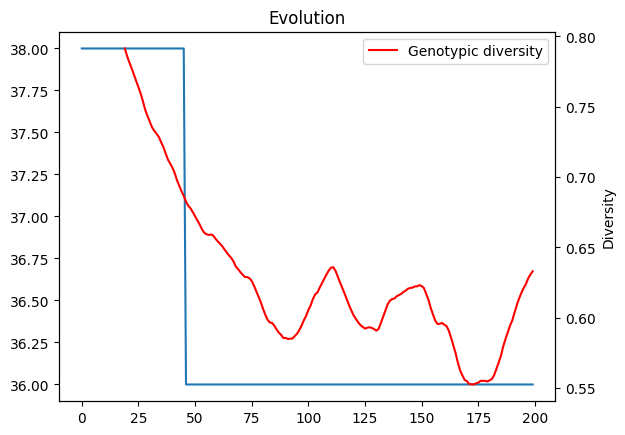

In [26]:
population.plot_history(ma_smooth_ratio=0.1, genodiv=True)

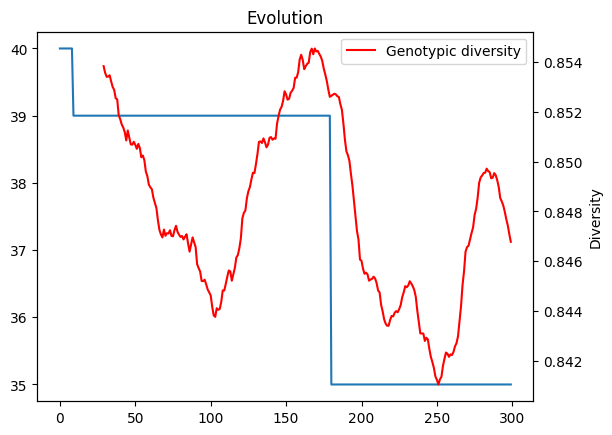

In [23]:
population.plot_history(ma_smooth_ratio=0.1, genodiv=True)

In [34]:
population = Population(size=50, initial_board=test_board)
print([ind.fitness for ind in population.individuals])
a = [ind.swappable for ind in population.individuals]
for i in a: 
    print(i)

[36, 42, 41, 43, 37, 47, 43, 48, 43, 44, 38, 29, 40, 47, 41, 48, 44, 38, 38, 44, 39, 35, 46, 45, 38, 44, 33, 42, 37, 36, 51, 39, 36, 38, 45, 40, 38, 38, 43, 45, 41, 37, 37, 45, 35, 45, 35, 44, 41, 42]
[2 3 4 5 7 5 3 5 6 3 4 5 4 1 8 8 9 7 2 3 5 1]
[9 4 8 5 4 3 4 8 6 1 8 5 7 1 3 3 9 4 9 4 8 5]
[6 3 8 6 7 5 3 3 5 7 8 6 5 4 5 3 8 7 6 3 2 4]
[6 7 4 9 6 8 7 2 7 1 4 9 9 8 5 3 1 6 6 7 5 4]
[3 4 9 1 3 8 4 6 3 7 9 1 5 4 5 2 6 3 3 4 1 8]
[6 3 8 3 4 8 3 1 5 2 8 3 4 3 5 1 6 4 6 3 9 7]
[7 9 8 8 1 5 9 5 3 3 8 8 8 5 6 6 9 1 7 9 3 1]
[7 4 6 2 8 4 4 6 4 5 6 2 1 7 3 1 5 8 7 4 8 9]
[3 8 8 3 4 6 8 6 9 1 8 3 8 4 5 2 5 4 3 8 4 9]
[5 3 5 4 3 7 3 9 8 8 5 4 1 6 5 5 7 3 5 3 8 3]
[8 5 9 3 3 5 5 7 1 2 9 3 1 8 5 6 4 3 8 5 4 5]
[8 5 7 9 3 7 5 6 5 9 7 9 4 4 8 3 2 3 8 5 3 1]
[8 2 9 8 1 5 2 8 5 4 9 8 4 5 1 9 7 1 8 2 7 4]
[3 5 6 3 7 5 5 8 8 6 6 3 4 3 4 8 9 7 3 5 4 5]
[5 6 9 8 2 3 6 1 6 3 9 8 8 9 8 4 5 2 5 6 4 7]
[3 1 4 5 7 8 1 4 9 5 4 5 9 6 2 8 7 7 3 1 6 4]
[7 4 4 5 4 8 4 8 5 3 4 5 3 1 9 9 3 4 7 4 7 5]
[8 7 2 7 6 3 7 3 

In [35]:
population.evolve(
    gens = 1000, 
    xo_prob = 0.4,
    mut_prob = 0.7, 
    select_type='roulette',
    xo='single_point',
    mutation='change',   # Change instead of swap
    elite_size=1,
    swap_number=1,
    diversify='fitness-sharing',
)

Best individual of gen #1: 29
Best individual of gen #2: 29
Best individual of gen #3: 29
Best individual of gen #4: 29
Best individual of gen #5: 29
Best individual of gen #6: 29
Best individual of gen #7: 29
Best individual of gen #8: 29
Best individual of gen #9: 29
Best individual of gen #10: 29
Best individual of gen #11: 29
Best individual of gen #12: 29
Best individual of gen #13: 29
Best individual of gen #14: 29
Best individual of gen #15: 29
Best individual of gen #16: 29
Best individual of gen #17: 29
Best individual of gen #18: 29
Best individual of gen #19: 29
Best individual of gen #20: 29
Best individual of gen #21: 29
Best individual of gen #22: 29
Best individual of gen #23: 29
Best individual of gen #24: 29
Best individual of gen #25: 29
Best individual of gen #26: 29
Best individual of gen #27: 29
Best individual of gen #28: 29
Best individual of gen #29: 29
Best individual of gen #30: 29
Best individual of gen #31: 29
Best individual of gen #32: 29
Best individual o

In [36]:
print([ind.fitness for ind in population.individuals])
a = [ind.swappable for ind in population.individuals]
for i in a: 
    print(i)

[29, 43, 46, 48, 45, 44, 45, 46, 49, 43, 49, 40, 47, 47, 42, 42, 54, 46, 47, 48, 47, 46, 45, 41, 51, 47, 51, 51, 49, 44, 49, 47, 45, 47, 46, 47, 47, 46, 45, 51, 47, 47, 43, 47, 54, 51, 44, 50, 47, 44]
[8 5 7 9 3 7 5 6 5 9 7 9 4 4 8 3 2 3 8 5 3 1]
[9 8 5 5 3 2 8 5 2 8 5 5 7 2 9 6 9 3 9 8 5 8]
[1 7 5 4 6 1 7 7 1 7 5 4 2 7 6 6 1 6 1 7 8 3]
[5 7 4 2 6 6 7 1 7 9 2 2 5 5 8 3 5 6 5 7 2 7]
[3 3 8 8 6 3 3 7 3 3 8 8 1 1 8 6 7 6 7 3 5 3]
[6 3 4 2 4 3 3 2 9 3 4 2 6 1 9 5 6 4 6 3 2 3]
[1 7 5 8 6 1 7 7 5 5 8 8 1 1 6 4 1 6 1 7 8 3]
[9 8 5 9 3 2 8 3 2 8 5 9 9 8 8 6 9 3 9 8 5 8]
[5 7 7 7 7 6 7 1 6 7 7 6 6 2 2 3 5 7 5 7 2 7]
[7 7 1 5 5 3 7 7 7 7 1 5 7 8 5 8 7 5 7 7 5 7]
[8 7 2 8 6 1 8 7 1 8 2 8 8 9 5 3 8 6 8 8 2 8]
[7 1 5 9 5 7 1 3 3 3 5 9 9 8 5 9 7 5 7 1 5 3]
[2 3 8 8 3 3 9 7 3 9 8 8 1 1 5 8 2 3 2 9 5 9]
[9 9 2 8 7 7 9 3 6 7 2 8 5 1 2 3 5 7 9 9 4 8]
[1 7 5 9 6 1 7 3 1 7 5 8 7 1 8 6 1 6 1 7 8 3]
[1 5 9 9 6 9 5 6 3 5 9 9 1 1 2 8 1 6 1 5 9 3]
[8 2 6 6 9 5 2 9 1 7 6 6 8 1 8 6 8 9 8 2 6 7]
[9 9 2 8 6 7 9 3 

In [37]:
population.history

{0: (29, -8199.73320978054, 0.8483272727272727),
 1: (29, -8655.081257797268, 0.8416),
 2: (29, -8573.33758606014, 0.8274545454545454),
 3: (29, -8720.177797678727, 0.8443272727272727),
 4: (29, -8882.567160433631, 0.8505090909090909),
 5: (29, -8672.837062376604, 0.8555999999999999),
 6: (29, -8980.099110502568, 0.8421454545454545),
 7: (29, -9156.178808238923, 0.8378181818181818),
 8: (29, -8906.243467695502, 0.8404727272727273),
 9: (29, -8904.003194028468, 0.8393454545454545),
 10: (29, -9154.544728487315, 0.837890909090909),
 11: (29, -8853.788454808582, 0.8266909090909091),
 12: (29, -8975.475450495744, 0.8223636363636364),
 13: (29, -9151.590621264153, 0.8166181818181818),
 14: (29, -9506.689142567651, 0.798509090909091),
 15: (29, -8918.456415954875, 0.8144727272727272),
 16: (29, -8999.339413927804, 0.8203272727272728),
 17: (29, -9277.621774253575, 0.8053818181818182),
 18: (29, -9306.391770739743, 0.7941090909090909),
 19: (29, -9253.106669042369, 0.7877090909090909),
 20: (

In [19]:
population.evolve(
    gens = 10000, 
    xo_prob = 0.6,
    mut_prob = 0.6, 
    select_type='roulette',
    xo='single_point',
    mutation='change',   # Change instead of swap
    elite_size=5,
    swap_number=1,
    diversify='fitness-sharing',
)

Best individual of gen #1: 31. Mean fitness: 41.98
Best individual of gen #2: 31. Mean fitness: 43.04
Best individual of gen #3: 31. Mean fitness: 44.47
Best individual of gen #4: 31. Mean fitness: 45.13
Best individual of gen #5: 31. Mean fitness: 44.84
Best individual of gen #6: 31. Mean fitness: 45.04
Best individual of gen #7: 31. Mean fitness: 44.64
Best individual of gen #8: 31. Mean fitness: 45.61
Best individual of gen #9: 31. Mean fitness: 44.96
Best individual of gen #10: 31. Mean fitness: 45.86
Best individual of gen #11: 31. Mean fitness: 44.79
Best individual of gen #12: 31. Mean fitness: 43.58
Best individual of gen #13: 31. Mean fitness: 45.16
Best individual of gen #14: 31. Mean fitness: 44.87
Best individual of gen #15: 30. Mean fitness: 44.4
Best individual of gen #16: 30. Mean fitness: 45.14
Best individual of gen #17: 30. Mean fitness: 45.25
Best individual of gen #18: 30. Mean fitness: 44.57
Best individual of gen #19: 30. Mean fitness: 45.82
Best individual of gen

KeyboardInterrupt: 

In [2]:
# Lets do grid search to find the best parameters for the hill climbing algorithm
hill_climbing_args={'num_neighbours': np.arange(1, 10, 1), 
                    'swap_number': np.arange(1, 10, 1)}

num_iterations = 20
num_combinations = 1

means = {}
stds = {}
unable_args = []

for combination in tqdm.tqdm(range(num_combinations)):
    unable = False
    # Get the random parameters
    # arg_dictionnary = {'num_neighbours': np.random.choice(hill_climbing_args['num_neighbours']),
    #                     'swap_number': np.random.choice(hill_climbing_args['swap_number']), 
    #                     'max_iterations': 100000,
    #                     'plateau_threshold': 100
    #                     }

    arg_dictionnary = {'num_neighbours': 10*combination+1,
                        'swap_number': 1, 
                        'max_iterations': 100000,
                        'plateau_threshold': 1000,
                        'verbose': 2
                        }
    
    temp_results = []
    for iteration in range(num_iterations):
        if unable:
            break
        start = time.time()
        try:
            Sudoku(hill_climbing_args=arg_dictionnary)
        except:
            unable = True
            continue

        finish = time.time()
        temp_results.append(finish-start)
    
    if unable:
        print('Unable to solve the puzzle with arguments: ', arg_dictionnary)
        unable_args.append(arg_dictionnary)
        continue

    means[arg_dictionnary['num_neighbours'], arg_dictionnary['swap_number']] = np.mean(temp_results)
    stds[arg_dictionnary['num_neighbours'], arg_dictionnary['swap_number']] = np.std(temp_results)

100%|██████████| 1/1 [00:00<?, ?it/s]

Unable to solve the puzzle with arguments:  {'num_neighbours': 1, 'swap_number': 1, 'max_iterations': 100000, 'plateau_threshold': 1000, 'verbose': 2}


#### Initialization of the sudoku arguments

In [3]:
sudoku = Sudoku(initial_board=np.zeros((9,9), dtype=int), fill_board='random')
sudoku.display()


 9  5  1  |  9  2  2  |  6  5  7 
 6  1  3  |  1  3  1  |  2  7  2 
 3  8  8  |  1  1  3  |  6  4  9 
----------|-----------|----------
 4  2  6  |  8  4  5  |  4  8  3 
 6  8  1  |  3  3  4  |  3  4  6 
 8  9  7  |  5  9  8  |  7  7  3 
----------|-----------|----------
 8  7  4  |  7  7  1  |  2  9  6 
 6  6  4  |  4  5  2  |  5  9  5 
 9  9  5  |  2  8  2  |  7  5  1 


In [17]:
sudoku = Sudoku()

In [15]:
sim_annealing_algo = Sim_annealing(sudoku)
sim_annealing_algo.run(L=100, c=20, alpha=0.95)

[[3 6 2 9 1 4 7 5 8]
 [9 1 4 5 7 8 3 2 6]
 [5 7 8 3 2 6 9 1 4]
 [8 9 1 2 3 5 4 7 6]
 [2 4 5 1 6 7 8 9 3]
 [7 3 6 8 4 9 1 2 5]
 [6 5 7 4 9 1 2 8 9]
 [1 8 9 6 8 2 5 3 7]
 [4 2 3 7 5 3 6 4 1]]

In [ ]:
# Lets do grid search to find the best parameters for the hill climbing algorithm
hill_climbing_args={'num_neighbours': np.arange(1, 10, 1), 
                    'swap_number': np.arange(1, 10, 1)}

num_iterations = 20
num_combinations = 1

means = {}
stds = {}
unable_args = []

for combination in tqdm.tqdm(range(num_combinations)):
    unable = False
    # Get the random parameters
    # arg_dictionnary = {'num_neighbours': np.random.choice(hill_climbing_args['num_neighbours']),
    #                     'swap_number': np.random.choice(hill_climbing_args['swap_number']), 
    #                     'max_iterations': 100000,
    #                     'plateau_threshold': 100
    #                     }

    arg_dictionnary = {'num_neighbours': 10*combination+1,
                        'swap_number': 1, 
                        'max_iterations': 100000,
                        'plateau_threshold': 1000,
                        'verbose': 2
                        }
    
    temp_results = []
    for iteration in range(num_iterations):
        if unable:
            break
        start = time.time()
        try:
            Sudoku(hill_climbing_args=arg_dictionnary)
        except:
            unable = True
            continue

        finish = time.time()
        temp_results.append(finish-start)
    
    if unable:
        print('Unable to solve the puzzle with arguments: ', arg_dictionnary)
        unable_args.append(arg_dictionnary)
        continue

    means[arg_dictionnary['num_neighbours'], arg_dictionnary['swap_number']] = np.mean(temp_results)
    stds[arg_dictionnary['num_neighbours'], arg_dictionnary['swap_number']] = np.std(temp_results)

100%|██████████| 1/1 [00:00<?, ?it/s]

Unable to solve the puzzle with arguments:  {'num_neighbours': 1, 'swap_number': 1, 'max_iterations': 100000, 'plateau_threshold': 1000, 'verbose': 2}


In [211]:
fitness_time = {}
num_combs = 100
num_iters = 20

for i in tqdm.tqdm(range(num_combs)):
    alpha = np.random.uniform(0.5, 0.99)
    c = np.random.randint(1, 50)
    L = np.random.randint(1, 50)

    temp_times = []
    temp_fitness = []

    for j in range(num_iters):
        start = time.time()
        fitness = sim_annealing(sudoku, verbose=0, alpha=alpha, c=c, L=L).fitness
        finish = time.time()
        temp_times.append(finish-start)
        temp_fitness.append(fitness)

    mean_time = np.mean(temp_times)
    mean_fitness = np.mean(temp_fitness)
    fitness_time[alpha, c, L, mean_fitness] = mean_time


df = pd.DataFrame.from_dict(fitness_time, orient='index', columns=['time'])
# Sepparate the index into columns
df['alpha'] = df.index.map(lambda x: x[0])
df['c'] = df.index.map(lambda x: x[1])
df['L'] = df.index.map(lambda x: x[2])
df['fitness'] = df.index.map(lambda x: x[3])
# Drop the index
df = df.reset_index().drop(columns='index')

df[df['fitness'] < 10]

100%|██████████| 100/100 [17:47<00:00, 10.68s/it]


In [41]:
sudoku.fitness

82

In [50]:
filled_sudoku = hill_climbing(sudoku, max_iterations=100, plateau_threshold=100, verbose=2, num_neighbours=1, swap_number=1)
filled_sudoku = sim_annealing(filled_sudoku, verbose=1, alpha=0.978727, c=4, L=33)
filled_sudoku.fitness

Reached max iterations, returned [[9 5 6 8 8 2 1 4 6]
 [5 3 5 1 4 5 8 7 2]
 [3 1 8 6 2 7 7 2 3]
 [8 7 5 7 9 1 3 2 6]
 [7 2 9 5 3 9 4 8 1]
 [7 6 1 4 9 2 3 5 8]
 [2 4 6 1 6 8 9 4 7]
 [1 9 3 5 4 1 6 3 7]
 [4 4 6 9 9 3 2 8 5]]
SA found with fitness 18


2

In [53]:
filled_sudoku = sim_annealing(sudoku, verbose=1, alpha=0.985, c=10, L=5)
filled_sudoku = hill_climbing(filled_sudoku, verbose=1, num_neighbours=1, swap_number=2, max_iterations=100000, plateau_threshold=1000)

SA found with fitness 25
Reached max iterations, returned [[2 1 7 8 3 4 5 9 6]
 [5 9 4 6 2 7 1 3 8]
 [3 8 6 9 5 1 2 7 4]
 [9 3 8 4 1 6 2 5 7]
 [4 7 5 2 8 9 3 4 1]
 [1 6 2 3 7 5 8 6 9]
 [6 2 9 5 4 8 7 1 3]
 [7 4 3 1 9 2 6 8 5]
 [8 5 1 7 6 3 4 2 9]]


In [198]:
filled_sudoku = hill_climbing(sudoku, verbose=1, num_neighbours=10, swap_number=1, max_iterations=100000, plateau_threshold=1000)

In [4]:
filled_sudoku.display()


 1  6  5  |  8  2  3  |  7  4  9 
 2  7  9  |  6  1  4  |  5  3  8 
 3  4  8  |  9  5  7  |  6  2  1 
----------|-----------|----------
 3  9  6  |  1  4  5  |  8  7  2 
 5  4  2  |  3  8  2  |  9  1  6 
 3  7  1  |  2  6  9  |  8  5  4 
----------|-----------|----------
 8  5  7  |  3  9  2  |  1  6  4 
 6  3  9  |  5  1  8  |  4  5  7 
 7  1  4  |  9  7  6  |  3  2  8 


In [5]:
# Iterate over all the positions to get where the conflict is 
for i in range(9):
    print(f'{i+1}th Box conflicts: {box_conflicts(filled_sudoku.board, i)}')
    print(f'{i+1}th Row conflicts: {row_conflicts(filled_sudoku.board, i)}')
    print(f'{i+1}th Col conflicts: {col_conflicts(filled_sudoku.board, i)}')

1th Box conflicts: 0
1th Row conflicts: 0
1th Col conflicts: 2
2th Box conflicts: 0
2th Row conflicts: 0
2th Col conflicts: 2
3th Box conflicts: 0
3th Row conflicts: 0
3th Col conflicts: 1
4th Box conflicts: 1
4th Row conflicts: 0
4th Col conflicts: 2
5th Box conflicts: 1
5th Row conflicts: 1
5th Col conflicts: 1
6th Box conflicts: 1
6th Row conflicts: 0
6th Col conflicts: 1
7th Box conflicts: 1
7th Row conflicts: 0
7th Col conflicts: 1
8th Box conflicts: 1
8th Row conflicts: 1
8th Col conflicts: 2
9th Box conflicts: 1
9th Row conflicts: 1
9th Col conflicts: 2


In [3]:
new_individual = Sudoku(hill_climbing_args={'max_iterations' : 100000, 
                                            'verbose': 3, 
                                            'num_neighbours': 100,
                                            'plateau_threshold': 10000})

Iteration 0 : Found a better solution with fitness: 74
Iteration 1 : Found a better solution with fitness: 71
Iteration 2 : Found a better solution with fitness: 67
Iteration 3 : Found a better solution with fitness: 63
Iteration 4 : Found a better solution with fitness: 60
Iteration 5 : Found a better solution with fitness: 57
Iteration 6 : Found a better solution with fitness: 54
Iteration 7 : Found a better solution with fitness: 52
Iteration 8 : Found a better solution with fitness: 50
Iteration 9 : Found a better solution with fitness: 48
Iteration 10 : Found a better solution with fitness: 46
Iteration 11 : Found a better solution with fitness: 44
Iteration 12 : Found a better solution with fitness: 43
Iteration 13 : Found a better solution with fitness: 42
Iteration 14 : Found a better solution with fitness: 39
Iteration 15 : Found a better solution with fitness: 37
Iteration 16 : Found a better solution with fitness: 36
Iteration 17 : Found a better solution with fitness: 35
It

AttributeError: 'Sudoku' object has no attribute 'initial_board'